In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('CC.csv')

In [3]:
dataset.isnull().values.any() # checks whether dataset has null values or not

True

In [4]:
#Removes any null values by the mean
dataset = dataset.fillna(dataset.mean())

In [5]:
dataset.isnull().values.any()

False

In [6]:
x = dataset.iloc[:,1:]

In [7]:
x

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


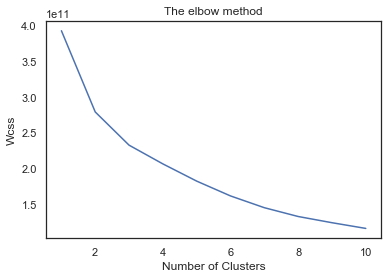

In [8]:
# Question1 (Part2)
#Elbow plot to find number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=0)
    kmeans.fit(x) #training the model
    #Assigns the Sum of squared distances of samples to their closest cluster center in each iteration
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [10]:
#Question2
#building the model
km = KMeans(n_clusters=3)

#training the model
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics

#calculating the score 
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("score before scaling: ",score)

score before scaling 0.4676551448676236


In [11]:
#Question3
# feature scaling
scaler =preprocessing.StandardScaler()
scaler.fit(x)
x_scaled_array=scaler.transform(x)
x_scaled=pd.DataFrame(x_scaled_array, columns =x.columns)

#building the model

km = KMeans(n_clusters=3)
km.fit(x_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x_scaled)
from sklearn import metrics
score = metrics.silhouette_score(x_scaled, y_cluster_kmeans)
print("score after scaling",score)


score after scaling 0.25055570796307736


In [12]:
#Question4
#Applying PCA

pca = PCA(2)
x_pca = pca.fit_transform(x)

#applying pca on scaled data

pca = PCA(2)
x_pca_scaler = pca.fit_transform(x_scaled_array)



In [13]:
# Bonus Question1
# Applying SCALING+PCA+KMEANS

#PCA+KMEANS

##building the model 
km = KMeans(n_clusters=3)
km.fit(x_pca)
# predict the cluster for each data point
y_cluster_kmeanspca= km.predict(x_pca)
from sklearn import metrics

score = metrics.silhouette_score(x_pca, y_cluster_kmeanspca)
print("score after pca+kmeans",score)

#2 SCALING+PCA+KMEANS

##building the model 
km = KMeans(n_clusters=3)
km.fit(x_pca_scaler)
# predict the cluster for each data point
y_cluster_kmeansscaler= km.predict(x_pca_scaler)
from sklearn import metrics
score = metrics.silhouette_score(x_pca_scaler, y_cluster_kmeansscaler)
print("score after scaling+pca+kmeans",score)


score after pca+kmeans 0.5720003152910856
score after scaling+pca+kmeans 0.4524487634385001


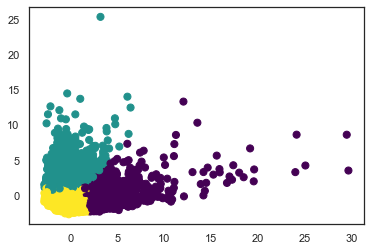

In [14]:
#Bonus 2nd question
#Visualize the clustering of first bonus question
# plot for SCALING+PCA+KMEANS
plt.scatter(x_pca_scaler[:, 0], x_pca_scaler[:, 1], c=y_cluster_kmeans, s=50, cmap='viridis')
plt.show()